# **Proyecto Final - "Identificación de operadores ineficientes en CallMeMaybe mediante análisis de datos y modelado predictivo"**

**Link a la presentación y Dashboard:**

https://www.canva.com/design/DAGmH-fsZI4/l3tU6SCd-NcX6s35cnfdFg/edit?utm_content=DAGmH-fsZI4&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton 

                                                    Propuesta de Plan de Trabajo                                                           

## **Descomposición**

### **Objetivo**

El objetivo principal de este proyecto es definir, identificar y predecir la ineficiencia operativa en el desempeño de operadores telefónicos de la empresa CallMeMaybe, a través del análisis del comportamiento en llamadas y la construcción de un modelo de clasificación binaria, entendiendo la ineficiencia como un patrón de comportamiento basado en tres factores clave: alta proporción de llamadas entrantes perdidas, tiempos de espera prolongados para clientes, y un bajo número de llamadas salientes cuando se espera actividad proactiva.

Esto se realiza con el propóstio de optimizar la calidad del servicio al cliente, mejorar la asignación de recursos humanos y apoyar decisiones estratégicas sobre capacitación, incentivos o redistribución de personal. 

**¿A quién va dirigido?**

Este análisis está dirigido los supervisores, que buscan identificar oportunidades de mejora dentro de sus equipos y así ofrecer un mejor servicio a sus clientes finales mediante una atención más eficaz. 

**Posibles decisiones que se pueden tomar de acuerdo al análisis**
* Asignación de entrenamiento adicional a operadores ineficientes.
* Ajuste en la programación de turnos para evitar cuellos de botella. 
* Posible rediseño de roles o uso de IA para apoyar en tareas de bajo desempeño.
* Implementación de sistemas de alerta o monitoreo en tiempo real basado en el modelo predictivo.

### **Definición de ineficiencia operativa**

Un operador será considerado ineficiente si cumple uno de los siguientes tres criterios: 
* Proporción alta de llamadas entrantes perdidas (internas y externas) mayor a la media
* Tiempo de espera prolongado para las llamadas entrantes mayor a la media 
* Bajo volumen de llamadas salientes menor a la media

### **Posibles Hipótesis**

* Hipótesis: ¿Hay relación entre llamadas perdidas y la ineficiencia?
* Hipótesis: ¿Hay relación entre el tiempo de espera promedio y la ineficiencia
* Hipótesis: ¿La hora o el día influye en la ineficiencia?
* Hipótesis: ¿El tipo de llamada (interna o externa) se asocia a la duración?
* Hipótesis: ¿La tarifa del cliente influye en el comportamiento de los operadores?
* Hipótesis: ¿Los operadores asignados a ciertos clientes son más propensos a ser ineficientes?
* Hipótesis: ¿Los operadores que manejan más llamadas internas tienen menor carga operativa real?

### **Etapas generales del proyecto**

1. **Preprocesamiento de datos:**
    * Preparar los datos para su análisis.
    * Limpieza de datos: manejo de valores ausentes y duplicados .
    * Conversión y transformación de tipos de datos (fechas, booleanos, categóricos).
    * Generación de nuevas variables o columnas
2. **Análisis Exploratorio de Datos:**
    * Comprender el comportamiento general y detectar patrones.
    * Análisis de la distribución general de llamadas.
    * Visualizaciones (gráficos de barras, histogramas, heatmaps, boxplots).
    * Análisis comparativo entre operadores.
    * Estadísticas descriptivas por operador, cliente y tipo de llamada.
3. **Análisis de hipótesis:**
    * Validar hipótesis clave sobre posibles factores que afectan la eficiencia.
    * Ejecución de pruebas estadísticas (T-test, Mann-Whitney, chi-cuadrado o el indicado según su tipo de variable)
    * Visualizaciones
4. **Definición y clasificación de ineficiencia:**
    * Formalizar los criterios de ineficiencia a partir de los datos y resultados previos
    * Generación de columnas adicionales en caso de ser necesario
5. **Construcción de modelo predictivo:** 
    * Predecir la probabilidad de ineficiencia en base al comportamiento del operador.
        * Selección de variables
        * División en conjunto de entrenamiento/prueba
        * Aplicación de modelos (Regresión logística / Random Forest)
        * Evaluación de métricas
6. **Visualización de Resultados y Conclusiones:**
    * Comunicar los hallazgos de forma visual para la toma de decisiones
    * Mediante la creación de un dashboard en Tableau o Power Bi
    * Conclusiones específicas como:
        * ¿Qué factores son clave en la ineficiencia?
        * ¿Qué perfiles de operadores requieren capacitación?
        * En caso de influir el plan del cliente ¿Cómo afecta en la ineficiencia?

## **Introducción**

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos
- Identificar operadores ineficaces
- Prueba las hipótesis estadísticas

## **Descripción de los datos**

Los datasets contienen información sobre el uso del servicio de telefonía virtual CallMeMaybe. Sus clientes son organizaciones que necesitan distribuir gran cantidad de llamadas entrantes entre varios operadores, o realizar llamadas salientes a través de sus operadores. Los operadores también pueden realizar llamadas internas para comunicarse entre ellos. Estas llamadas se realizan a través de la red de CallMeMaybe.

El dataset comprimido `telecom_dataset_us.csv` contiene las siguientes columnas:

- `user_id`: ID de la cuenta de cliente
- `date`: fecha en la que se recuperaron las estadísticas
- `direction`: "dirección" de llamada (`out` para saliente, `in` para entrante)
- `internal`: si la llamada fue interna (entre los operadores de un cliente o clienta)
- `operator_id`: identificador del operador
- `is_missed_call`: si fue una llamada perdida
- `calls_count`: número de llamadas
- `call_duration`: duración de la llamada (sin incluir el tiempo de espera)
- `total_call_duration`: duración de la llamada (incluido el tiempo de espera)

 

El conjunto de datos `telecom_clients_us.csv` tiene las siguientes columnas:

- `user_id`: ID de usuario/a
- `tariff_plan`: tarifa actual de la clientela
- `date_start`: fecha de registro de la clientela

## **Procesamiento de datos**

### Importamos librerías

In [117]:
# Importamos librerías
import pandas as pd # Para manipulación de datos
import numpy as np # Para manipulación de datos
import datetime # Para manipulación de fechas
import math as mth # Para funciones matemáticas

# Para pruebas estadísticas
import scipy.stats as stats # Para pruebas estadísticas
from scipy.stats import norm # Para distribuciones estadísticas
from scipy.stats import t # Para distribuciones t de Student
from scipy.stats import chi2 # Para distribuciones chi-cuadrado
from scipy.stats import chisquare # Para pruebas chi-cuadrado
from scipy.stats import chi2_contingency # Para pruebas chi-cuadrado de independencia
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

# Para visualización de datos
import seaborn as sns # Para visualización de datos
import matplotlib.pyplot as plt # Para visualización de datos
import matplotlib.cm as cm # Para mapas de colores
from matplotlib.colors import Normalize # Para normalización de colores

import plotly.express as px # Para visualización de datos
import plotly.graph_objects as go # Para visualización de datos
import plotly_express as px # Para gráficos interactivos
import plotly.graph_objects as go # Para gráficos interactivos
import chart_studio.plotly as py # Para gráficos interactivos

import cufflinks as cf # Para gráficos interactivos

# Make plotly work in your jupyter notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # Para gráficos interactivos
# use plotly locally
cf.go_offline() # Para gráficos interactivos

# Para pronósticos 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cdist # Para calcular distancias

### Importamos los datasets

In [118]:
# Importamos los datos
telecom_df = pd.read_csv('telecom_dataset_us.csv')
telecom_clients = pd.read_csv('telecom_clients_us.csv')

### Información de telecom dataset

In [119]:
# Telecom dataset
print(telecom_df.head())
print(telecom_df.info())

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Coun

In [120]:
print(telecom_df.duplicated().sum()) # Verificamos si hay duplicados

4900


Observaciones:

1. La columna user_id, no tiene valores nulos y tiene el tipo de dato correcto.
2. La columna 'date', no tiene valores nulos pero el tipo de dato hay que cambiarlo a datetime y lo mejor sería agregar columnas de día, mes y año. Por otro lado, los valores están manejando zona horaria y además no se registró la hora ni minutos, por lo que solo podremos trabajar con fechas.
3. La columna 'direction', no tiene valores nulos y tiene el tipo de dato correcto, alomejor podríamos cambiarlo a tipo category ya que se trata solo de dos opciones (internal y out)
4. La columna 'internal', tiene pocos valores ausentes y el tipo de dato hay que cambiarlo a bool. ¿Qué haremos con los ausentes? Realmente son pocos en comparación a la cantidad de valores que tenemos, así que podríamos eliminarlos para que no nos hagan ruido o dejarlos como ausentes y no tomarlos en cuenta en nuestros cálculos. Realmente como no me gusta elimianr filas a menos que sea muy necesario, así que la decisión será sustituir los ausentes por un "espacio en blanco" o alguna nota como "no defined"...
5. La columna 'operator_id' tiene valores ausentes sin embargo, no  nos afecta realmente porque no es una columna numérica como tal, no se harán cálculos con ella, por lo que podemos manejar los valores ausentes reemplazandolo por un cero.
6. La columna is_missed_call no tiene valores ausentes y el tipo de dato es correcto
7. Las columnas calls_count, call_duration y total_call_duration no tienen valores ausentes y tienen el tipo de dato correcto.

Por último, tenemos 4900 filas duplicadas, vamos a eliminarlas y proceder con los cambios propuestos.

#### **Preparación de los datos**

In [121]:
# Eliminamos duplicados
telecom_df = telecom_df.drop_duplicates()

In [122]:
# Manejamos los valores ausentes
telecom_df = telecom_df.dropna(subset=['internal']) # Eliminamos los ausentes porque son pocos y no afectan el análisis
telecom_df['operator_id'] = telecom_df['operator_id'].fillna(0) # Reemplazamos los ausentes por 0 (de esta forma no afecta el análisis) por ser un valor categórico

In [123]:
# Cambiaremos las columnas booleanas a binarias, es decir, 0 = False y 1 = True
telecom_df['internal'] = telecom_df['internal'].map({True: 1, False: 0})
telecom_df['is_missed_call'] = telecom_df['is_missed_call'].map({True: 1, False: 0})

In [124]:
# Cambiamos los tipos de dato al correcto
telecom_df['date'] = pd.to_datetime(telecom_df['date'])
telecom_df['direction'] = telecom_df['direction'].astype('category')
#telecom_df['internal'] = telecom_df['internal'].astype('int64')
telecom_df['operator_id'] = telecom_df['operator_id'].astype('int64')

# Agregamos columnas adicionales 
telecom_df['wait_time'] = telecom_df['total_call_duration'] - telecom_df['call_duration']
telecom_df['avg_call_duration_per_call'] = telecom_df['call_duration'] / telecom_df['calls_count']
telecom_df['avg_total_call_duration_per_call'] = telecom_df['total_call_duration'] / telecom_df['calls_count']
telecom_df['avg_wait_time_per_call'] = telecom_df['wait_time'] / telecom_df['calls_count']

# Agregamos columnas adicionales de date
telecom_df['year'] = telecom_df['date'].dt.year
telecom_df['month'] = telecom_df['date'].dt.month
telecom_df['day'] = telecom_df['date'].dt.day
telecom_df['day_of_week'] = telecom_df['date'].dt.dayofweek

In [125]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48892 entries, 0 to 53901
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype                    
---  ------                            --------------  -----                    
 0   user_id                           48892 non-null  int64                    
 1   date                              48892 non-null  datetime64[ns, UTC+03:00]
 2   direction                         48892 non-null  category                 
 3   internal                          48892 non-null  int64                    
 4   operator_id                       48892 non-null  int64                    
 5   is_missed_call                    48892 non-null  int64                    
 6   calls_count                       48892 non-null  int64                    
 7   call_duration                     48892 non-null  int64                    
 8   total_call_duration               48892 non-null  int64                    
 9   

In [126]:
telecom_df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,avg_call_duration_per_call,avg_total_call_duration_per_call,avg_wait_time_per_call,year,month,day,day_of_week
0,166377,2019-08-04 00:00:00+03:00,in,0,0,1,2,0,4,4,0.0,2.000000,2.000000,2019,8,4,6
1,166377,2019-08-05 00:00:00+03:00,out,1,880022,1,3,0,5,5,0.0,1.666667,1.666667,2019,8,5,0
2,166377,2019-08-05 00:00:00+03:00,out,1,880020,1,1,0,1,1,0.0,1.000000,1.000000,2019,8,5,0
3,166377,2019-08-05 00:00:00+03:00,out,1,880020,0,1,10,18,8,10.0,18.000000,8.000000,2019,8,5,0
4,166377,2019-08-05 00:00:00+03:00,out,0,880022,1,3,0,25,25,0.0,8.333333,8.333333,2019,8,5,0


### **Informacion de telecom clients dataset**

In [127]:
# Telecom dataset
print(telecom_clients.head())
print(telecom_clients.info())
print(telecom_clients.duplicated().sum())

   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None
0


Observación:

Primeramente, no tenemos valores ausentes. Segundo la columna tariff_plan la podemos cambiar a categórica y la de date_start, definitivamente cambiaremos el tipo de dato a datetime, y agregaremos columnas extras para year, month, date y week.

#### **Preparación de los datos**

In [128]:
# Cambiamos el tipo de dato
telecom_clients['tariff_plan'] = telecom_clients['tariff_plan'].astype('category')
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'])

# Agregacomos columnas adicionales de date
telecom_clients['year_start'] = telecom_clients['date_start'].dt.year
telecom_clients['month_start'] = telecom_clients['date_start'].dt.month
telecom_clients['day_start'] = telecom_clients['date_start'].dt.day
telecom_clients['day_of_week_start'] = telecom_clients['date_start'].dt.dayofweek

In [129]:
telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            732 non-null    int64         
 1   tariff_plan        732 non-null    category      
 2   date_start         732 non-null    datetime64[ns]
 3   year_start         732 non-null    int32         
 4   month_start        732 non-null    int32         
 5   day_start          732 non-null    int32         
 6   day_of_week_start  732 non-null    int32         
dtypes: category(1), datetime64[ns](1), int32(4), int64(1)
memory usage: 23.8 KB


In [130]:
telecom_clients.head()

,user_id,tariff_plan,date_start,year_start,month_start,day_start,day_of_week_start
0,166713,A,2019-08-15,2019,8,15,3
1,166901,A,2019-08-23,2019,8,23,4
2,168527,A,2019-10-29,2019,10,29,1
3,167097,A,2019-09-01,2019,9,1,6
4,168193,A,2019-10-16,2019,10,16,2


## **Análisis Exploratorio de Datos**

Considerando estas 3 métricas por las que se considera a un operador ineficiente:
* Proporción alta de llamadas entrantes perdidas (internas y externas)
* Tiempo de espera prolongado para las llamadas entrantes
* Bajo volumen de llamadas salientes

Enfocaremos nuestros análisis tomando en cuenta el objeto de estudio.

#### **Análisis General**

In [131]:
# ¿Cuántos operadores tenemos?
print('Tenemos',telecom_df['operator_id'].nunique(),'operadores únicos')

Tenemos 1093 operadores únicos


In [132]:
# ¿Cuántos clientes tenemos?
print('Tenemos',telecom_df['user_id'].nunique(),'clientes únicos')

Tenemos 307 clientes únicos


In [133]:
# ¿En qué rango de fechas abarcan nuestros datos?
print(telecom_df['date'].min(), telecom_df['date'].max())

2019-08-02 00:00:00+03:00 2019-11-28 00:00:00+03:00


In [134]:
# Descripción de variables numéricas
print(telecom_df.describe())

             user_id      internal    operator_id  is_missed_call  \
count   48892.000000  48892.000000   48892.000000    48892.000000   
mean   167294.492841      0.115622  777779.541684        0.437638   
std       598.675508      0.319775  329077.221961        0.496101   
min    166377.000000      0.000000       0.000000        0.000000   
25%    166782.000000      0.000000  890416.000000        0.000000   
50%    167158.000000      0.000000  906406.000000        0.000000   
75%    167819.000000      0.000000  930020.000000        1.000000   
max    168606.000000      1.000000  973286.000000        1.000000   

        calls_count  call_duration  total_call_duration     wait_time  \
count  48892.000000   48892.000000         48892.000000  48892.000000   
mean      16.495214     868.088788          1158.976458    290.887671   
std       63.671633    3779.549967          4456.180933   1133.354018   
min        1.000000       0.000000             0.000000      0.000000   
25%        1.

En la columna calls_count tenemos el 75% de los datos en 12 llamadas y un máximo de 4817, definitivamente esto es un valor muy atípico ¿Que habrá pasado aqui? ¿Será conveniente eliminarlo o dejarlo ahí? Puede que sean muchas llamadas perdidas y como son parte de la métrica, lo mejor sería dejarlo.

Por otro lado, en las duraciones de llamadas y tiempo de espera, el 75% de los datos no se compara en absoluto con los máximos, tenemos muchísimos valores atípicos, lo que puede estar relacionado con operadores ineficientes (pocos pero con comportamientos fuera de lo normal).

**Distribución de cantidad de llamadas y tiempo en cada una**

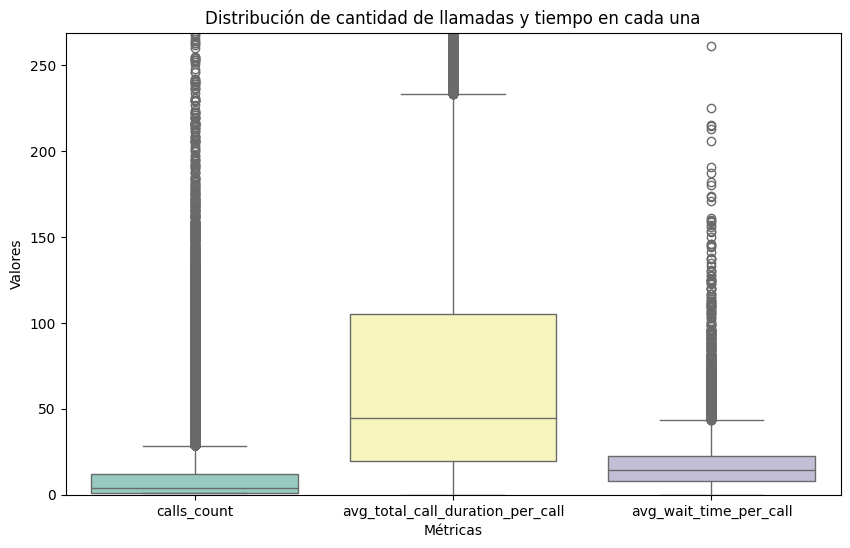

In [135]:
# Seleccionamos las columnas que nos interesan
cols = ['calls_count', 'avg_total_call_duration_per_call', 'avg_wait_time_per_call']

# Creamos el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=telecom_df[cols], palette="Set3")

# Personalizamos
plt.title("Distribución de cantidad de llamadas y tiempo en cada una")
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.ylim(0, telecom_df[cols].quantile(.95).max())

plt.show()

Observación

Efectivamente tenemos varios valores atípicos, sin embargo, dada la cantidad, podría pensarse que no fueron por errores de captura. En cantidad de llamadas totales por operador y por día, tenemos 4 puntos 'relevantes' dada su extremidad. El punto que más llama la atención es el que está por llegar a 5000 llamadas, ¿realmente esto es posible? Probablemente hayan sido llamadas perdidas y por eso se elevó el número.

Por otro lado, el tiempo promedio de duración por llamada el valor máximo se acerca a 4000 segundos, es decir, al rededor de 60 minutos. Sin embargo, si nos fijamos en el tiempo de espera, no parece haber demasiados datos atípicos en comparación con los otros, lo que podría indicar que son pocos operadores los que dejan mucho tiempo de espera en las llamadas, así como los que duran más en las llamadas con los clientes.

**Distribución de llamadas entrantes y salientes por día de la semana**

In [136]:
# LLamadas entrantes y salientes por día de la semana
day_of_week_in_out_calls = telecom_df.groupby(['day_of_week','direction'], observed=False)['calls_count'].sum().reset_index()
print(day_of_week_in_out_calls)

    day_of_week direction  calls_count
0             0        in        34613
1             0       out       105276
2             1        in        37851
3             1       out       113779
4             2        in        33571
5             2       out       109605
6             3        in        35253
7             3       out       113479
8             4        in        30683
9             4       out       101796
10            5        in        15784
11            5       out        37546
12            6        in         9871
13            6       out        27377


In [137]:
# Como vamos a visualizar datos respecto al día de la semana, para que sea más explícito y entendible, cambiaremos los números de la semana con su respectivo nombre
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_of_week_in_out_calls['day_of_week'] = day_of_week_in_out_calls['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Convertimos a categórico y orenamos
day_of_week_in_out_calls['day_of_week'] = pd.Categorical(day_of_week_in_out_calls['day_of_week'], categories=day_order, ordered=True)

# Graficamos
fig = px.bar(day_of_week_in_out_calls, 
             x='day_of_week', 
             y='calls_count', 
             color='direction', 
             barmode='group',
             text='calls_count',
             title='Cantidad de llamadas por día de la semana',
             labels={'day_of_week': 'Día de la semana', 'calls_count': 'Cantidad de llamadas'},)

fig.show()

El comportamiento es muy constante tanto para las llamadas entrantes como las salientes. No parece haber diferencia significativa en los días, por lo que indica que la carga laboral está bien distribuida durante la semana.

#### **Regla de Clasificación por Ineficiencia**

Para clasificar a los operadores por ineficiente o eficiente, aplicaremos la siguiente regla:

    Si el resultado de la métrica por operador, rebasa el límite máximo del diagrama de bigotes, es decir, cuando pasa a ser outlier, se considerará como ineficiente. De igual forma, para caso contrario.

#### **Llamadas entrantes**

In [138]:
# Filtramos por llamadas entrantes
incoming_calls = telecom_df[telecom_df['direction']=='in']
incoming_calls

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,avg_call_duration_per_call,avg_total_call_duration_per_call,avg_wait_time_per_call,year,month,day,day_of_week
0,166377,2019-08-04 00:00:00+03:00,in,0,0,1,2,0,4,4,0.0,2.000000,2.000000,2019,8,4,6
7,166377,2019-08-05 00:00:00+03:00,in,0,0,1,6,0,35,35,0.0,5.833333,5.833333,2019,8,5,0
9,166377,2019-08-06 00:00:00+03:00,in,0,0,1,4,0,62,62,0.0,15.500000,15.500000,2019,8,6,1
17,166377,2019-08-07 00:00:00+03:00,in,0,0,1,2,0,24,24,0.0,12.000000,12.000000,2019,8,7,2
26,166377,2019-08-12 00:00:00+03:00,in,0,880028,0,1,407,411,4,407.0,411.000000,4.000000,2019,8,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53889,168603,2019-11-28 00:00:00+03:00,in,0,0,1,1,0,30,30,0.0,30.000000,30.000000,2019,11,28,3
53891,168606,2019-11-08 00:00:00+03:00,in,0,957922,1,1,0,7,7,0.0,7.000000,7.000000,2019,11,8,4
53893,168606,2019-11-08 00:00:00+03:00,in,0,0,1,6,0,121,121,0.0,20.166667,20.166667,2019,11,8,4
53894,168606,2019-11-08 00:00:00+03:00,in,0,957922,0,2,686,705,19,343.0,352.500000,9.500000,2019,11,8,4


**Proporción de llamadas entrantes perdidas**

In [139]:
# Calcular la proporción de llamadas entrantes perdidas por operador
missed_call_ratio_per_operator = incoming_calls.groupby('operator_id').apply(
    lambda x: x['is_missed_call'].sum() / x['calls_count'].sum()
).reset_index(name='missed_call_ratio')

missed_call_ratio_per_operator['missed_call_ratio'] = missed_call_ratio_per_operator['missed_call_ratio'].round(2)

# Mostrar el resultado
print(missed_call_ratio_per_operator.sort_values(by='missed_call_ratio', ascending=False).head(10))

     operator_id  missed_call_ratio
642       948756               1.00
288       913886               0.50
110       897872               0.33
498       937432               0.33
468       934098               0.33
699       957922               0.33
266       910226               0.25
432       930242               0.25
186       904344               0.25
81        894232               0.25


C:\Users\Andrea\AppData\Local\Temp\ipykernel_20936\904937091.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Mediana de proporción de llamadas entrantes perdidas**

In [140]:
# Mediana de proporción de llamadas entrantes perdidas
print(missed_call_ratio_per_operator['missed_call_ratio'].median())

0.0


**Cuartiles de proporción de llamadas entrantes perdidas**

In [141]:
# Cálculo de cuartiles
missed_call_ratio_quantiles = missed_call_ratio_per_operator['missed_call_ratio'].quantile([0.25, 0.5, 0.75])
print(missed_call_ratio_quantiles)
# Límite supeior (antes de outliers) -> Q3 + 1.5 * IQR (IQR = Q3 - Q1)
missed_call_ratio_limit = missed_call_ratio_per_operator['missed_call_ratio'].quantile(0.75) + 1.5 * (missed_call_ratio_quantiles[0.75] - missed_call_ratio_quantiles[0.25])
print('\nLímite superior:', missed_call_ratio_limit)

0.25    0.00
0.50    0.00
0.75    0.01
Name: missed_call_ratio, dtype: float64

Límite superior: 0.025


**Operadores ineficientes en proporción de llamadas perdidas**

In [142]:
# Operadores ineficientes en proporción de llamadas perdidas
inefficient_operators_by_missed_calls = missed_call_ratio_per_operator[missed_call_ratio_per_operator['missed_call_ratio'] > missed_call_ratio_limit]
print(inefficient_operators_by_missed_calls.sort_values(by='missed_call_ratio', ascending=False))

     operator_id  missed_call_ratio
642       948756               1.00
288       913886               0.50
110       897872               0.33
498       937432               0.33
468       934098               0.33
..           ...                ...
540       938614               0.03
545       939224               0.03
487       935958               0.03
660       951508               0.03
689       955032               0.03

[92 rows x 2 columns]


In [143]:
# Gráfico de top 10 operadores más ineficientes en proporción de llamadas perdidas
inefficient_operators_by_missed_calls['operator_id'] = inefficient_operators_by_missed_calls['operator_id'].astype('str') # Convertimos a categoría para el gráfico

fig = px.bar(inefficient_operators_by_missed_calls.sort_values(by='missed_call_ratio', ascending=False).head(10), 
             x='operator_id', 
             y='missed_call_ratio', 
             color='missed_call_ratio',
             text='missed_call_ratio',
             title='Top 10 operadores más ineficientes en proporción de llamadas perdidas',
             labels={'operator_id': 'ID del operador', 'missed_call_ratio': 'Proporción de llamadas perdidas'},)

fig.show()

**Tiempo de espera para llamadas entrantes**

In [144]:
# Tiempo promedio de espera para llamadas entrantes
wating_time_per_operator = incoming_calls.groupby('operator_id').apply(
    lambda x: x['wait_time'].sum() / x['calls_count'].sum()
).reset_index(name='avg_wait_time_per_call')

wating_time_per_operator['avg_wait_time_per_call'] = wating_time_per_operator['avg_wait_time_per_call'].round(2)

# Mostrar el resultado
print(wating_time_per_operator.sort_values(by='avg_wait_time_per_call', ascending=False).head(20))

     operator_id  avg_wait_time_per_call
200       905842                  115.50
312       917680                  100.00
716       960296                   63.00
353       920930                   62.00
226       907174                   61.89
363       922114                   61.00
124       899900                   58.00
251       908300                   56.33
269       910958                   54.54
494       937366                   53.67
249       908162                   53.00
150       901498                   53.00
486       935956                   52.50
208       906076                   50.96
711       958470                   50.67
493       937362                   50.60
692       956080                   50.40
709       958460                   49.64
600       944228                   48.72
107       896538                   47.50


C:\Users\Andrea\AppData\Local\Temp\ipykernel_20936\120709399.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Mediana de tiempo de espera para llamadas entrantes**

In [145]:
# Mediana de tiempo de espera para las llamadas entrantes
print(wating_time_per_operator['avg_wait_time_per_call'].median())

14.43


**Cuartiles de la distribución de tiempo de espera**

In [146]:
# Cálculo de cuartiles
wating_time_per_operator_quantiles = wating_time_per_operator['avg_wait_time_per_call'].quantile([0.25, 0.5, 0.75])
print(wating_time_per_operator_quantiles)

# Límite supeior (antes de outliers) -> Q3 + 1.5 * IQR (IQR = Q3 - Q1)
wating_time_per_operator_limit = wating_time_per_operator['avg_wait_time_per_call'].quantile(0.75) + 1.5 * (wating_time_per_operator_quantiles[0.75] - wating_time_per_operator_quantiles[0.25])
print('\nLímite superior:', wating_time_per_operator_limit.round(2))

0.25     9.410
0.50    14.430
0.75    21.825
Name: avg_wait_time_per_call, dtype: float64

Límite superior: 40.45


**Operadores ineficientes por tiempo de espera**

In [147]:
# Operadores ineficientes por tiempo de espera para llamadas entrantes
inefficient_operators_by_waiting_time = wating_time_per_operator[wating_time_per_operator['avg_wait_time_per_call'] > wating_time_per_operator_limit]

print(inefficient_operators_by_waiting_time.sort_values(by='avg_wait_time_per_call', ascending=False))

     operator_id  avg_wait_time_per_call
200       905842                  115.50
312       917680                  100.00
716       960296                   63.00
353       920930                   62.00
226       907174                   61.89
363       922114                   61.00
124       899900                   58.00
251       908300                   56.33
269       910958                   54.54
494       937366                   53.67
150       901498                   53.00
249       908162                   53.00
486       935956                   52.50
208       906076                   50.96
711       958470                   50.67
493       937362                   50.60
692       956080                   50.40
709       958460                   49.64
600       944228                   48.72
107       896538                   47.50
413       928092                   47.20
216       906402                   46.29
275       911142                   46.15
663       951650

In [148]:
# Gráfico de top 10 operadores más ineficientes en tiempo de espera para llamadas entrantes
inefficient_operators_by_waiting_time['operator_id'] = inefficient_operators_by_waiting_time['operator_id'].astype('str') # Convertimos a categoría para el gráfico

fig = px.bar(inefficient_operators_by_waiting_time.sort_values(by='avg_wait_time_per_call', ascending=False).head(10), 
             x='operator_id', 
             y='avg_wait_time_per_call', 
             color='avg_wait_time_per_call',
             text='avg_wait_time_per_call',
             title='Top 10 operadores más ineficientes por tiempo promedio de espera',
             labels={'operator_id': 'ID del operador', 'avg_wait_time_per_call': 'Tiempo promedio de espera(seg)'},)

fig.show()

#### **Llamadas salientes**

In [149]:
# Llamadas salientes
outgoing_calls = telecom_df[telecom_df['direction']=='out'] 
outgoing_calls

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,avg_call_duration_per_call,avg_total_call_duration_per_call,avg_wait_time_per_call,year,month,day,day_of_week
1,166377,2019-08-05 00:00:00+03:00,out,1,880022,1,3,0,5,5,0.00,1.666667,1.666667,2019,8,5,0
2,166377,2019-08-05 00:00:00+03:00,out,1,880020,1,1,0,1,1,0.00,1.000000,1.000000,2019,8,5,0
3,166377,2019-08-05 00:00:00+03:00,out,1,880020,0,1,10,18,8,10.00,18.000000,8.000000,2019,8,5,0
4,166377,2019-08-05 00:00:00+03:00,out,0,880022,1,3,0,25,25,0.00,8.333333,8.333333,2019,8,5,0
5,166377,2019-08-05 00:00:00+03:00,out,0,880020,0,2,3,29,26,1.50,14.500000,13.000000,2019,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53895,168606,2019-11-09 00:00:00+03:00,out,0,957922,0,4,551,593,42,137.75,148.250000,10.500000,2019,11,9,5
53896,168606,2019-11-10 00:00:00+03:00,out,1,957922,0,1,0,25,25,0.00,25.000000,25.000000,2019,11,10,6
53897,168606,2019-11-10 00:00:00+03:00,out,1,957922,1,1,0,38,38,0.00,38.000000,38.000000,2019,11,10,6
53898,168606,2019-11-11 00:00:00+03:00,out,1,957922,0,2,479,501,22,239.50,250.500000,11.000000,2019,11,11,0


**Llamadas salientes por operador**

In [150]:
# Volumen de llamdas salientes por operador
outgoing_calls_per_operator = outgoing_calls.groupby('operator_id')['calls_count'].sum().reset_index(name='outgoing_calls_count')

print(outgoing_calls_per_operator.sort_values(by='outgoing_calls_count', ascending=True).head(20))

     operator_id  outgoing_calls_count
869       970240                     1
872       970250                     1
428       924572                     1
862       969284                     1
103       895266                     1
525       935956                     1
572       937872                     1
748       949420                     1
578       937956                     1
545       937716                     1
544       937710                     1
546       937720                     1
294       914272                     1
875       970258                     1
292       914256                     1
140       900192                     1
476       930326                     1
488       930820                     1
487       930816                     1
776       952968                     1


**Mediana de llamadas salientes**

In [151]:
# Mediana de volumen de llamadas salientes
print(outgoing_calls_per_operator['outgoing_calls_count'].median())

90.0


**Cuartiles de la distribución de llamadas salientes**

In [152]:
# Cálculo de cuartiles
outgoing_calls_per_operator_quantiles = outgoing_calls_per_operator['outgoing_calls_count'].quantile([0.25, 0.5, 0.75])
print(outgoing_calls_per_operator_quantiles)

0.25     11.0
0.50     90.0
0.75    591.5
Name: outgoing_calls_count, dtype: float64


**Operadores ineficientes por llamadas salientes**

    Nota: En este caso, por no haber ouliers inferiores, clasificaremos a los operadores ineficientes si están *por debajo* del cuartil 1, es decir, debajo del 25% de los datos.

In [153]:
# Operadores ineficientes por bajo volumen de llamadas salientes
inefficient_operators_by_outgoing_calls = outgoing_calls_per_operator[outgoing_calls_per_operator['outgoing_calls_count'] < outgoing_calls_per_operator_quantiles[0.25]]

print(inefficient_operators_by_outgoing_calls.sort_values(by='outgoing_calls_count', ascending=True))

     operator_id  outgoing_calls_count
9         882478                     1
15        883898                     1
46        890234                     1
65        891192                     1
75        891918                     1
..           ...                   ...
777       953362                    10
651       941736                    10
610       939718                    10
762       951650                    10
870       970242                    10

[214 rows x 2 columns]


In [ ]:
# Gráfico de top 10 operadores más ineficientes por bajo volumen de llamadas salientes
inefficient_operators_by_outgoing_calls['operator_id'] = inefficient_operators_by_outgoing_calls['operator_id'].astype('str') # Convertimos a categoría para el gráfico

fig = px.bar(inefficient_operators_by_outgoing_calls.sort_values(by='outgoing_calls_count', ascending=True).head(10),
             x='operator_id',
             y='outgoing_calls_count',
             color='outgoing_calls_count',
             text='outgoing_calls_count',
             labels={'operator_id': 'ID del operador', 'outgoing_calls_count': 'Cantidad de llamadas salientes'},
             title='Top 10 operadores ineficientes por volumen de llamadas salientes'
             )
fig.show()

Claramente tenemos muchos operadores que solamente hacen 1 llamada, cuando se espera que realicen más.

#### **Análisis de Relación de Métricas**
* direction + internal -> ¿las llamadas internas son más comunes en cierto tipo de dirección?
* is_missed_call + internal -> ¿las llamadas internas son las más perdidas?
* calls_count + operator_id -> ¿algunos operadores tienen más llamadas recibidas o hechas que otros?

In [155]:
direction_and_internal = telecom_df.groupby(['direction','internal', 'is_missed_call'])['calls_count'].sum().reset_index()

print(direction_and_internal)

C:\Users\Andrea\AppData\Local\Temp\ipykernel_20936\727181095.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



  direction  internal  is_missed_call  calls_count
0        in         0               0        92786
1        in         0               1       103219
2        in         1               0          677
3        in         1               1          944
4       out         0               0       329306
5       out         0               1       266518
6       out         1               0         7963
7       out         1               1         5071


In [156]:
# ¿Las llamadas internas en cierto tipo de dirección son más comunes?
print(direction_and_internal.groupby(['direction', 'internal'])['calls_count'].sum().reset_index())

C:\Users\Andrea\AppData\Local\Temp\ipykernel_20936\2730063093.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



  direction  internal  calls_count
0        in         0       196005
1        in         1         1621
2       out         0       595824
3       out         1        13034


Las llamadas internas son más comunes en cuando se hacen que cuando se reciben. Sin embargo, las que no son internas, aproximadamente la mitad de las llamadas totales se pierden.

In [157]:
# Crear un gráfico de barras para cada región
plt.figure(figsize=(12,9))

fig = px.bar(
    direction_and_internal,
    x='direction',
    y='calls_count',  
    color='is_missed_call',
    facet_col='internal',
    facet_col_wrap=2,
    title='Distribución de llamadas perdidas por dirección y llamadas internas',
    labels={'direction': 'Dirección', 'is_missed_call': 'Es llamada perdida', 'calls_count': 'Cantidad de llamadas', 'internal': 'Es llamada interna'},
    barmode='group',
    text='calls_count'
)
# Mostrar el gráfico
fig.show()

<Figure size 1200x900 with 0 Axes>

Enfocándonos en el gráfico de lado izquierdo, la mayor cantidad de llamadas son de y hacia los clientes, donde las llamadas perdidas son mayores en entrantes, sin embargo, en las llamadas salientes está casi equilibrado entre llamadas perdidas y no perdidas.

**Clients**

In [158]:
telecom_clients.head()

,user_id,tariff_plan,date_start,year_start,month_start,day_start,day_of_week_start
0,166713,A,2019-08-15,2019,8,15,3
1,166901,A,2019-08-23,2019,8,23,4
2,168527,A,2019-10-29,2019,10,29,1
3,167097,A,2019-09-01,2019,9,1,6
4,168193,A,2019-10-16,2019,10,16,2


In [159]:
clients_plan = telecom_clients.groupby('tariff_plan')['user_id'].count().reset_index(name='clients_count')

plt.figure(figsize=(12,9))

fig = px.bar(
    clients_plan,
    x='tariff_plan',
    y='clients_count',  
    color='tariff_plan',
    title='Cantidad de clientes por plan tarifario',
    labels={'tariff_plan': 'Plan tarifario', 'clients_count': 'Cantidad de clientes'},
    text='clients_count'
)
# Mostrar el gráfico
fig.show()

C:\Users\Andrea\AppData\Local\Temp\ipykernel_20936\3570841464.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x900 with 0 Axes>

Observación:

La mayoría de los clientes tienen el plan C, y muy pocos el plan A. 

## **Operadores Clasificados por Ineficiencia**

#### **Unimos las métricas por operador**

In [160]:
missed_call_ratio_per_operator

,operator_id,missed_call_ratio
0,0,0.07
1,879896,0.00
2,879898,0.00
3,880020,0.00
4,880022,0.00
...,...,...
750,971102,0.00
751,971354,0.00
752,972412,0.00
753,972460,0.00


In [161]:
wating_time_per_operator

,operator_id,avg_wait_time_per_call
0,0,12.16
1,879896,9.90
2,879898,16.24
3,880020,7.71
4,880022,14.00
...,...,...
750,971102,17.79
751,971354,14.00
752,972412,25.00
753,972460,4.00


In [162]:
outgoing_calls_per_operator

,operator_id,outgoing_calls_count
0,0,515
1,879896,872
2,879898,7209
3,880020,38
4,880022,189
...,...,...
878,972408,6
879,972410,77
880,972412,60
881,972460,50


In [163]:
# Combinamos todas las métricas en un solo DataFrame
operator_metrics = pd.merge(
    missed_call_ratio_per_operator,
    wating_time_per_operator,
    on='operator_id',
    how='outer'
)

operator_metrics = pd.merge(
    operator_metrics,
    outgoing_calls_per_operator,
    on='operator_id',
    how='outer'
)

# Mostrar el resultado
operator_metrics

,operator_id,missed_call_ratio,avg_wait_time_per_call,outgoing_calls_count
0,0,0.07,12.16,515.0
1,879896,0.00,9.90,872.0
2,879898,0.00,16.24,7209.0
3,880020,0.00,7.71,38.0
4,880022,0.00,14.00,189.0
...,...,...,...,...
1088,972410,NaN,NaN,77.0
1089,972412,0.00,25.00,60.0
1090,972460,0.00,4.00,50.0
1091,973120,NaN,NaN,3.0


In [164]:
# Excluiremos al operador_id 0 ya que el enfoque de nuestro análisis es sobre los operadores
operator_metrics = operator_metrics[operator_metrics['operator_id'] != 0]

In [165]:
# Creamos columnas de ineficiencia (1 punto por cada una)
operator_metrics['inefficient_missed_call'] = (operator_metrics['missed_call_ratio'] > missed_call_ratio_limit).astype(int)
operator_metrics['inefficient_wait_time'] = (operator_metrics['avg_wait_time_per_call'] > wating_time_per_operator_limit).astype(int)
operator_metrics['inefficient_outgoing_volume'] = (operator_metrics['outgoing_calls_count'] < outgoing_calls_per_operator_quantiles[0.25]).astype(int)

In [166]:
# Calculamos el nivel de ineficiencia sumando las columnas binarias
operator_metrics['inefficiency_level'] = (
    operator_metrics['inefficient_missed_call'] +
    operator_metrics['inefficient_wait_time'] +
    operator_metrics['inefficient_outgoing_volume']
)

In [167]:
# Clasificamos según nivel de ineficiencia
def classify_inefficiency(level):
    if level == 0:
        return 'eficiente'
    elif level == 1:
        return 'ineficiente bajo'
    elif level == 2:
        return 'ineficiente medio'
    else:
        return 'ineficiente alto'

In [168]:
# Aplicamos la función de clasificación
operator_metrics['inefficiency_class'] = operator_metrics['inefficiency_level'].apply(classify_inefficiency)

In [169]:
# Sustituimos los valores ausentes por un cero para que no afecten los cálculos
operator_metrics.fillna(0, inplace=True) # El 0 en este contexto singificaría (no ineficiente por inexistencia)
# Mostramos el dataframe final
operator_metrics

,operator_id,missed_call_ratio,avg_wait_time_per_call,outgoing_calls_count,inefficient_missed_call,inefficient_wait_time,inefficient_outgoing_volume,inefficiency_level,inefficiency_class
1,879896,0.0,9.90,872.0,0,0,0,0,eficiente
2,879898,0.0,16.24,7209.0,0,0,0,0,eficiente
3,880020,0.0,7.71,38.0,0,0,0,0,eficiente
4,880022,0.0,14.00,189.0,0,0,0,0,eficiente
5,880026,0.0,5.96,2208.0,0,0,0,0,eficiente
...,...,...,...,...,...,...,...,...,...
1088,972410,0.0,0.00,77.0,0,0,0,0,eficiente
1089,972412,0.0,25.00,60.0,0,0,0,0,eficiente
1090,972460,0.0,4.00,50.0,0,0,0,0,eficiente
1091,973120,0.0,0.00,3.0,0,0,1,1,ineficiente bajo


### **Top Operadores más Ineficienetes**

In [ ]:
# Operadores más ineficientes
most_inefficient_operators = operator_metrics.groupby(['operator_id'])['inefficiency_level'].sum().reset_index()
most_inefficient_operators = most_inefficient_operators.query('inefficiency_level > 1')
print(most_inefficient_operators.sort_values(by='inefficiency_level', ascending=False))

Empty DataFrame
Columns: [operator_id, inefficiency_level]
Index: []


## **Prueba de Hipótesis**

**Hipótesis: ¿Hay relación entre la proporción de llamadas perdidas y la eficiencia?**

H0: No hay diferencia significativa en el porcentaje de llamadas perdidas entre operadores eficientes e ineficientes.

H1: Los operadores ineficientes tienen un porcentaje mayor de llamadas perdidas.

In [171]:
# Dividimos los datos en operadores eficientes e ineficientes
efficient_operators = operator_metrics[operator_metrics['inefficiency_level'] == 0]['missed_call_ratio']
inefficient_operators = operator_metrics[operator_metrics['inefficiency_level'] > 0]['missed_call_ratio']

# Prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(efficient_operators, inefficient_operators, alternative='less') # Prueba unilateral porque queremos ver si los operadores ineficientes tienen un porcentaje mayor de llamadas perdidas

print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H₀: Los operadores ineficientes tienen un porcentaje mayor de llamadas perdidas.")
else:
    print("No se puede rechazar H₀: No hay diferencia significativa en el porcentaje de llamadas perdidas.")

Estadístico U: 99505.5
Valor p: 5.937540906834263e-16
Rechazamos H₀: Los operadores ineficientes tienen un porcentaje mayor de llamadas perdidas.


**Hipótesis: ¿Hay relación entre las llamadas internas con la ineficiencia?**

H0: El tipo de llamada (interna/externa) no se asocia con la proporción de llamdas perdidas

H1: Ciertas direcciones (internas/externas) están asociadas con una mayor proporción de llamadas perdidas

In [172]:
# Creamos una tabla de contingencia
contingency_table = pd.crosstab(telecom_df['internal'], telecom_df['is_missed_call'])

# Prueba de Chi-cuadrado
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Estadístico Chi-cuadrado: {chi2}')
print(f'Valor p: {p_value}')

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: El tipo de llamada está asociado con la proporción de llamadas perdidas.")
else:
    print("No se puede rechazar H₀: No hay asociación significativa entre el tipo de llamada y las llamadas perdidas.")

Estadístico Chi-cuadrado: 49.7983610620781
Valor p: 1.7038623122341556e-12
Rechazamos H₀: El tipo de llamada está asociado con la proporción de llamadas perdidas.


In [173]:
print(contingency_table)

is_missed_call      0      1
internal                    
0               24564  18675
1                2931   2722


**Hipótesis: ¿Hay relación entre el tiempo de espera promedio y la eficiencia?**

H0: No hay diferencia en el tiempo promedio de espera entre operadores eficientes e ineficientes

H1: Los operadores ineficientes tienen mayor tiempo de espera

In [174]:
# Dividimos los datos en operadores eficientes e ineficientes
efficient_wait_time = operator_metrics[operator_metrics['inefficiency_level'] == 0]['avg_wait_time_per_call']
inefficient_wait_time = operator_metrics[operator_metrics['inefficiency_level'] > 0]['avg_wait_time_per_call']

# Prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(efficient_wait_time, inefficient_wait_time, alternative='less') # Prueba unilateral porque queremos ver si los operadores ineficientes tienen un tiempo de espera mayor

print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value}')

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Los operadores ineficientes tienen mayor tiempo de espera.")
else:
    print("No se puede rechazar H₀: No hay diferencia significativa en el tiempo promedio de espera.")

Estadístico U: 105835.5
Valor p: 1.774582367105487e-05
Rechazamos H₀: Los operadores ineficientes tienen mayor tiempo de espera.


**Hipótesis: ¿Hay relación entre el volumen de llamadas salientes y la eficiencia?** 

H₀: No hay diferencia significativa en el volumen de llamadas salientes entre operadores eficientes e ineficientes.

H₁: Los operadores ineficientes tienen menor volumen de llamadas salientes.

In [175]:
# Dividimos los datos en operadores eficientes e ineficientes
efficient_outgoing_calls = operator_metrics[operator_metrics['inefficiency_level'] == 0]['outgoing_calls_count']
inefficient_outgoing_calls = operator_metrics[operator_metrics['inefficiency_level'] > 0]['outgoing_calls_count']

# Prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(efficient_outgoing_calls, inefficient_outgoing_calls, alternative='less')

print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value}')

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Los operadores ineficientes tienen menor volumen de llamadas salientes.")
else:
    print("No se puede rechazar H₀: No hay diferencia significativa en el volumen de llamadas salientes.")

Estadístico U: 183354.5
Valor p: 1.0
No se puede rechazar H₀: No hay diferencia significativa en el volumen de llamadas salientes.


**Hipótesis: ¿Hay operadores que manejan mayor cantidad de llamadas?**

H₀: Todos los operadores manejan un número similar de llamadas.

H₁: Algunos operadores manejan significativamente más llamadas que otros.

*La prueba H de Kruskal-Wallis contrasta la hipótesis nula de que la mediana poblacional de todos los grupos es igual. Es una versión no paramétrica del ANOVA. La prueba funciona con dos o más muestras independientes, que pueden tener diferentes tamaños. Cabe destacar que rechazar la hipótesis nula no indica cuál de los grupos difiere. Se requieren comparaciones post hoc entre los grupos para determinar cuáles son diferentes.*

In [176]:
# Agrupamos por operador
call_counts = telecom_df.groupby('operator_id')['calls_count'].sum()

# Prueba de Kruskal-Wallis
# Sintaxis: kruskal(*args) -> args= una lista de arrays
# En este caso, agrupa los datos por operator_id, extrae los valoers de calls_count para cada grupo y realiza la prueba de Kruskal para comparar las distribuciones de calls_count entre operadores
stat, p_value = kruskal(*[group['calls_count'].values for _, group in telecom_df.groupby('operator_id')])

print(f'Estadístico H: {stat}')
print(f'Valor p: {p_value}')

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Algunos operadores manejan significativamente más llamadas que otros.")
else:
    print("No se puede rechazar H₀: Todos los operadores manejan un número similar de llamadas.")

Estadístico H: 18838.506078784612
Valor p: 0.0
Rechazamos H₀: Algunos operadores manejan significativamente más llamadas que otros.


**Hipótesis: ¿La duración de la llamada depende del tipo de llamada?**

H₀: La duración promedio de la llamada no difiere entre llamadas internas y externas.

H₁: La duración difiere según el tipo de llamada.

In [177]:
# Dividimos los datos en llamadas internas y externas
internal_calls = telecom_df[telecom_df['internal'] == 1]['call_duration']
external_calls = telecom_df[telecom_df['internal'] == 0]['call_duration']

# Prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(internal_calls, external_calls, alternative='two-sided')

print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value}')

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: La duración promedio de la llamada difiere según el tipo de llamada.")
else:
    print("No se puede rechazar H₀: No hay diferencia significativa en la duración promedio de la llamada.")

Estadístico U: 95712692.0
Valor p: 7.749636231585533e-169
Rechazamos H₀: La duración promedio de la llamada difiere según el tipo de llamada.


**Hipótesis: ¿El plan tarifario del cliente influye en la eficiencia?**

H₀: El plan tarifario del cliente no influye en la eficiencia del operador.

H₁: Ciertos planes tarifarios están asociados con mayor ineficiencia del operador.

In [ ]:
# Primero unimos los dataframes con el de clientes para tener el conjunto de datos completo
operator_metrics_clients_merged = pd.merge(telecom_df[['user_id','operator_id']], operator_metrics, on='operator_id')
operator_metrics_clients_merged = pd.merge(operator_metrics_clients_merged, telecom_clients, on='user_id')

In [179]:
# Verificamos valores duplicados y ausentes despues del merge
print(operator_metrics_clients_merged.duplicated().sum())
print(operator_metrics_clients_merged.info())

40399
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41491 entries, 0 to 41490
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   user_id                      41491 non-null  int64         
 1   operator_id                  41491 non-null  int64         
 2   missed_call_ratio            41491 non-null  float64       
 3   avg_wait_time_per_call       41491 non-null  float64       
 4   outgoing_calls_count         41491 non-null  float64       
 5   inefficient_missed_call      41491 non-null  int64         
 6   inefficient_wait_time        41491 non-null  int64         
 7   inefficient_outgoing_volume  41491 non-null  int64         
 8   inefficiency_level           41491 non-null  int64         
 9   inefficiency_class           41491 non-null  object        
 10  tariff_plan                  41491 non-null  category      
 11  date_start                   41491 

In [180]:
# Eliminamos valores duplicados 
operator_metrics_clients_merged = operator_metrics_clients_merged.drop_duplicates() 

In [181]:
# Agrupamos por plan tarifario
tariff_inefficiency_level = operator_metrics_clients_merged.groupby('tariff_plan')['inefficiency_level']

# Prueba de Kruskal-Wallis
stat, p_value = kruskal(*[group.values for _, group in tariff_inefficiency_level])

print(f'Estadístico H: {stat}')
print(f'Valor p: {p_value}')

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Ciertos planes tarifarios están asociados con mayor ineficiencia del operador.")
else:
    print("No se puede rechazar H₀: El plan tarifario no influye en la eficiencia del operador.")

Estadístico H: 4.959042895944554
Valor p: 0.08378331067324457
No se puede rechazar H₀: El plan tarifario no influye en la eficiencia del operador.


C:\Users\Andrea\AppData\Local\Temp\ipykernel_20936\2457708130.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\Andrea\AppData\Local\Temp\ipykernel_20936\1865470154.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



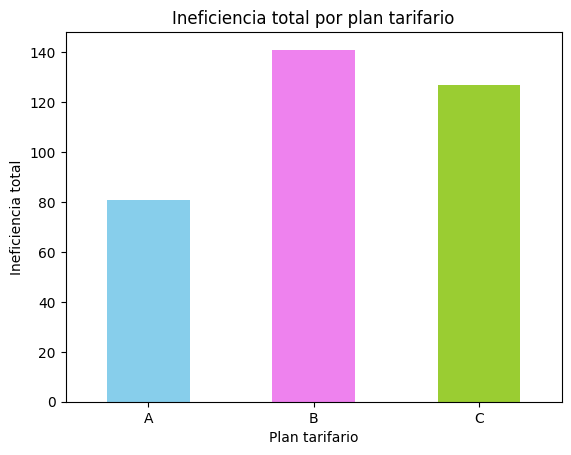

In [ ]:
# Agrupamos por plan tarifario 
tariff_inefficiency_per_plan = operator_metrics_clients_merged.groupby('tariff_plan')['inefficiency_level'].sum().reset_index()

# Creamos un gráfico de barras 
tariff_inefficiency_per_plan.plot(
    kind='bar',
    x='tariff_plan',
    y='inefficiency_level',
    title='Ineficiencia total por plan tarifario',
    xlabel='Plan tarifario',
    ylabel='Ineficiencia total',
    color=['skyblue','violet', 'yellowgreen'],
    rot=0,
    legend=False
)
plt.show()

Recordemos que la cantidad de usuarios por plan tarifario iba en orden ascendente, y a pesar de eso, el plan tariario B es el más influyente en la eficiencia de los operadores.

**Hipótesis: ¿Los clientes están asociados con la eficiencia del operador?**

H₀: El cliente (user_id) no influye en la eficiencia del operador.

H₁: Algunos clientes están asociados con operadores más ineficientes.

In [183]:
# Agrupamos por cliente
client_groups = operator_metrics_clients_merged.groupby('user_id')['inefficiency_level']

# Prueba de Kruskal-Wallis
stat, p_value = kruskal(*[group.values for _, group in client_groups])

print(f'Estadístico H: {stat}')
print(f'Valor p: {p_value}')

# Interpretación
if p_value < alpha:
    print("Rechazamos H₀: Algunos clientes están asociados con operadores más ineficientes.")
else:
    print("No se puede rechazar H₀: El cliente no influye en la eficiencia del operador.")

Estadístico H: 402.59700345858465
Valor p: 1.0937743898170011e-05
Rechazamos H₀: Algunos clientes están asociados con operadores más ineficientes.


In [184]:
# Gráfico top 10 clientes asociados a más ineficiencia de los operadores (puede servir para poder analizar las causas de la ineficiencia)
inefficiency_per_user = operator_metrics_clients_merged.groupby('user_id')['inefficiency_level'].sum().reset_index()
inefficiency_per_user['user_id'] = inefficiency_per_user['user_id'].astype('str') # Convertimos a categoría para el gráfico

fig = px.bar(inefficiency_per_user.sort_values(by='inefficiency_level', ascending=False).head(10),
             x='user_id',
             y='inefficiency_level',
             color='inefficiency_level',
             title='Top 10 clientes asociados a más ineficiencia de los operadores',
             labels={'user_id': 'ID del cliente', 'inefficiency_level': 'Ineficiencia total'},
)

fig.show()

In [ ]:
# Analizamos qué métricas son las que ocasiona la ineficiencia de este cliente
user_168187 = operator_metrics_clients_merged[(operator_metrics_clients_merged['user_id']==168187) & (operator_metrics_clients_merged['inefficiency_level']>1)][['missed_call_ratio', 'avg_wait_time_per_call','outgoing_calls_count', 'inefficiency_level']]
user_168187

NameError: name 'operator_metrics_clients_merged' is not defined

Claramente podemos ver que los operadores no pierden su llamada, todo lo contrario, hacen esperar de más a este cliente y realizan generalmente pocas llamadas, es por esto que el nivel de ineficiencia de los operadores se eleva. 

Sin embargo, esta ineficiencia no está relacionada directamente con un operador en específico. Solamente sirve como observación.

In [ ]:
# Top operadores más ineficientes asociados a este cliente '168187'
user_168187_operator_ineff = operator_metrics_clients_merged[(operator_metrics_clients_merged['user_id']==168187) & (operator_metrics_clients_merged['inefficiency_level']>1)][['operator_id', 'inefficiency_level']]

print(user_168187_operator_ineff.sort_values(by='inefficiency_level', ascending=False).head(10))

Empty DataFrame
Columns: [operator_id, inefficiency_level]
Index: []


¿Será que sea un cliente dificil de tratar? ¿Hay forma de poder capacitar a estos operadores para un mejor trato o más agilidad en la atención al cliente?

**Gráfico de cantidad de usuarios eficientes e ineficientes**

In [187]:
# Gráfico de cantidad de operadores eficientes e ineficientes (en el eje x vendrán la cantidad de usuarios con eficiencia = 0, 1, 2, 3)
inefficiency_per_operator = operator_metrics_clients_merged.groupby('operator_id')['inefficiency_level'].sum().reset_index()
inefficiency_per_operator['operator_id'] = inefficiency_per_operator['operator_id'].astype('str') # Convertimos a categoría para el gráfico

fig = px.bar(inefficiency_per_operator.sort_values(by='inefficiency_level', ascending=False),
             x='operator_id',
             y='inefficiency_level',
             color='inefficiency_level',
             title='Cantidad de operadores eficientes e ineficientes',
             labels={'operator_id': 'ID del operador', 'inefficiency_level': 'Ineficiencia total'},
)
fig.show()

El gráfico abarca a todos los operadores (1092) por lo que se puede dificultar un poco su visibilidad, sin embargo, a simple vista podemos observar que la cantidad de clientes con nivel de ineficiencia 2 es muy poca, en comparación con los de ineficiencia 1. Además, ¡Sorpresa! No tenemos operadores ineficientes alto, es una buena señal!

No está de más destacar que la mayoría de los operadores son eficientes, esto lo podemos ver porque en la mayor parte de los operadores no tienen barritas o indicadores de ineficiencia.

**Proporción de Operadores ineficientes vs Ineficiencia Total**

In [188]:
# Ordenar operadores por nivel de ineficiencia total
inefficiency_per_operator = operator_metrics_clients_merged.groupby('operator_id')['inefficiency_level'].sum().reset_index()
inefficiency_per_operator = inefficiency_per_operator.sort_values(by='inefficiency_level', ascending=False)

# Calcular el 20% superior de operadores
top_20_percent_count = int(len(inefficiency_per_operator) * 0.2)
top_20_percent = inefficiency_per_operator.head(top_20_percent_count)

# Calcular el porcentaje de ineficiencia total que representan
total_inefficiency = inefficiency_per_operator['inefficiency_level'].sum()
top_20_percent_inefficiency = top_20_percent['inefficiency_level'].sum()
percentage_contribution = (top_20_percent_inefficiency / total_inefficiency) * 100

print(f"El 20% de los operadores más ineficientes contribuyen con el {percentage_contribution:.2f}% de la ineficiencia total.")

El 20% de los operadores más ineficientes contribuyen con el 68.48% de la ineficiencia total.


Este resultado sugiere que casi la mitad de la ineficiencia total proviene de solo el 20% de los operadores. Aunque no llega al 80% como sugiere el principio, sigue siendo útil para priorizar esfuerzos. Se pueden enfocar recursos como capacitación o supervisión a este grupo reducido para maximizar el impacto en la mejora de la eificnecia general.

## **Principio de Pareto (80/20)**

El **Principio de Pareto (80/20)** es una herramienta útil para identificar las áreas clave que general el mayor impacto. En este proyecto, donde el propósito final es optimizar la eficiencia operativa de los operadores telefónicos, aplicar este principio nos permitirá *priorizar esfuerzos* en las cuasas principales de ineficiencia.

El análisis de ineficiencia operativa revela que no todos los operadores contribuyen de manera equitativa a los problemas identificados. De hecho, es probable que una pequeña proporción de operadores o métricas específicas sean responsable de la mayor parte de la ineficiencia total.

Al identificar el 20% de los operadores o métricas que contribuyen al 80% de la ineficiencia, podremos asignar recursos de manera más eficiente, y con esto, brindar información clara y relevante a los supervisores para la toma de decisiones estratégicas.

In [189]:
# Sumamos las métricas de ineficiencia
metrics_sum = {
    'Missed Calls': operator_metrics['inefficient_missed_call'].sum(),
    'Wait Time': operator_metrics['inefficient_wait_time'].sum(),
    'Outgoing Volume': operator_metrics['inefficient_outgoing_volume'].sum()
}

# Calculamos el porcentaje de contribución
total_inefficiency = sum(metrics_sum.values())
# Para cada clave (k) y su valor (v) en el diccionario metrics_sum, crea un nuevo par de clave:valor en donde:
## la clave sigue siendo k y el valor es el resultado de (v / total_inefficiency) * 100 
metrics_percentage = {k: (v / total_inefficiency) * 100 for k, v in metrics_sum.items()}

# Mostrar los resultados
print("Contribución de cada métrica a la ineficiencia total:")
for metric, percentage in metrics_percentage.items():
    print(f"{metric}: {percentage:.2f}%")

Contribución de cada métrica a la ineficiencia total:
Missed Calls: 26.07%
Wait Time: 12.61%
Outgoing Volume: 61.32%


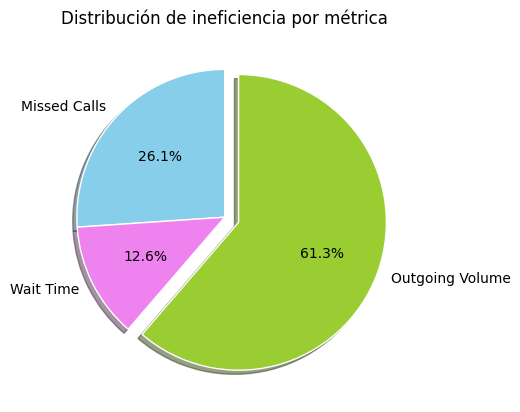

In [190]:
# Creamos un gráfico de pastel
explode = (0, 0, 0.1)  # Resaltamos la tercera sección

fig, ax = plt.subplots()
ax.pie(metrics_percentage.values(), # Los valores son los 'values' (cálculo de porcentaje) del diccionario
       explode=explode, # Extruye el segmento indicado en 'explode'
       labels=metrics_percentage.keys(), # Las etiquetas son las 'llaves' (nombres) del diccionario
       autopct='%1.1f%%', # Formato con un decimal
       shadow=True, # Aplicamos sombra
       startangle=90, 
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, # Propiedades del gráfico
       colors=['skyblue','violet','yellowgreen'])

ax.set_title('Distribución de ineficiencia por métrica')

plt.show()

**Conclusión**

La principal métrica que causa ineficiencia en los operadores es que realizan muy pocas llamadas cuando se espera sean más proactivos. De igual forma, aunque en menor proporción, tienen varias llamadas perdidas (entrantes) por lo que también hay que mejorar esta parte. ¿Acaso están ocupados con otros clientes y no pueden contestar esas llamadas? ¿Hay forma de disminuirlo?

## **Modelo Predictivo**
*Modelo de clasificación para predecir la ineficiencia de los operadores*

**Matriz de correlación**

In [191]:
operator_metrics_clients_merged

,user_id,operator_id,missed_call_ratio,avg_wait_time_per_call,outgoing_calls_count,inefficient_missed_call,inefficient_wait_time,inefficient_outgoing_volume,inefficiency_level,inefficiency_class,tariff_plan,date_start,year_start,month_start,day_start,day_of_week_start
0,166377,880022,0.00,14.00,189.0,0,0,0,0,eficiente,B,2019-08-01,2019,8,1,3
1,166377,880020,0.00,7.71,38.0,0,0,0,0,eficiente,B,2019-08-01,2019,8,1,3
6,166377,881278,0.00,0.00,20.0,0,0,0,0,eficiente,B,2019-08-01,2019,8,1,3
10,166377,880028,0.00,5.44,2497.0,0,0,0,0,eficiente,B,2019-08-01,2019,8,1,3
11,166377,880026,0.00,5.96,2208.0,0,0,0,0,eficiente,B,2019-08-01,2019,8,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41413,168598,958394,0.00,7.19,0.0,0,0,0,0,eficiente,C,2019-10-31,2019,10,31,3
41422,168601,952914,0.00,7.47,580.0,0,0,0,0,eficiente,C,2019-10-31,2019,10,31,3
41425,168601,952916,0.00,25.00,7.0,0,0,1,1,ineficiente bajo,C,2019-10-31,2019,10,31,3
41476,168603,959118,0.00,0.00,14.0,0,0,0,0,eficiente,B,2019-10-31,2019,10,31,3


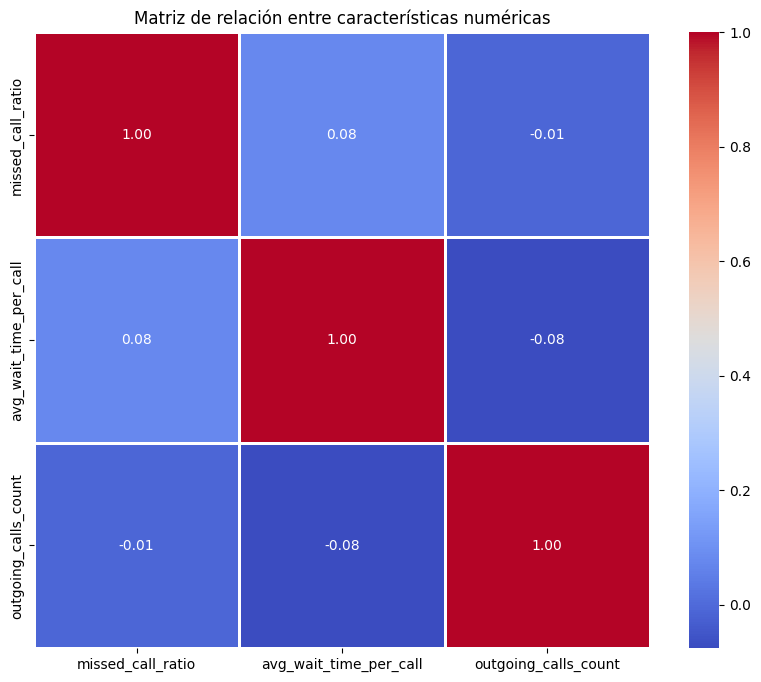

In [192]:
# Matriz de correlación
quant_cols = ['missed_call_ratio', 'avg_wait_time_per_call', 'outgoing_calls_count']

cm = operator_metrics[quant_cols].corr() 

plt.figure(figsize = (10, 8))
plt.title("Matriz de relación entre características numéricas")
sns.heatmap(cm, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm", 
            square=True, 
            linewidths=1, 
            linecolor='white')
plt.show()

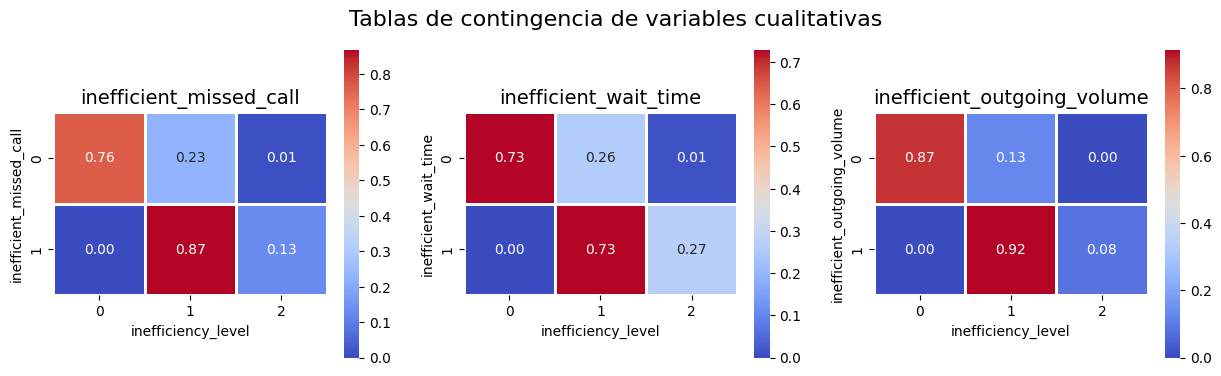

In [193]:
cat_cols = ['inefficient_missed_call', 'inefficient_wait_time', 'inefficient_outgoing_volume',]

cont_tables = []
for col in cat_cols:
    cont_table = pd.crosstab(index=operator_metrics[col], columns=operator_metrics['inefficiency_level'], normalize='index')
    cont_tables.append(cont_table)

# Graficamos las tablas de contingencia
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
for i, ax in enumerate(axs.flat):
    if i < len(cont_tables):
        sns.heatmap(cont_tables[i], annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=1, linecolor='white', ax=ax)
        ax.set_title(f'{cat_cols[i]}', fontsize=14)
    else:
        ax.axis('off')

plt.suptitle('Tablas de contingencia de variables cualitativas', fontsize=16)
plt.subplots_adjust(top=0.88)
plt.show()

### **Modelo de Regresión Logística**

In [194]:
# Creamos una copia del df por seguridad para usarla en el modelo
df_model = operator_metrics_clients_merged.copy()

In [195]:
# Variables que vamos a eliminar por redundancia o por tipo de dato
columns_to_drop = [
    'user_id',
    'operator_id',
    'inefficient_missed_call',
    'inefficient_wait_time',
    'inefficient_outgoing_volume',
    'inefficiency_class',
    'date_start',
    'year_start',
    'day_start'
]

df_model.drop(columns=columns_to_drop, inplace=True)

In [196]:
# Convertimos las variables categóricas a variables dummy (y evitar la colinealidad perfecta)
df_model = pd.get_dummies(df_model, columns=['tariff_plan', 'month_start', 'day_of_week_start'], drop_first=True)
df_model

,missed_call_ratio,avg_wait_time_per_call,outgoing_calls_count,inefficiency_level,tariff_plan_B,tariff_plan_C,month_start_9,month_start_10,day_of_week_start_1,day_of_week_start_2,day_of_week_start_3,day_of_week_start_4,day_of_week_start_5
0,0.00,14.00,189.0,0,True,False,False,False,False,False,True,False,False
1,0.00,7.71,38.0,0,True,False,False,False,False,False,True,False,False
6,0.00,0.00,20.0,0,True,False,False,False,False,False,True,False,False
10,0.00,5.44,2497.0,0,True,False,False,False,False,False,True,False,False
11,0.00,5.96,2208.0,0,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41413,0.00,7.19,0.0,0,False,True,False,True,False,False,True,False,False
41422,0.00,7.47,580.0,0,False,True,False,True,False,False,True,False,False
41425,0.00,25.00,7.0,1,False,True,False,True,False,False,True,False,False
41476,0.00,0.00,14.0,0,True,False,False,True,False,False,True,False,False


In [197]:
# Variable caracteristica
X = df_model.drop(columns='inefficiency_level')

# Variable objetivo
y = df_model['inefficiency_level']

# Dividimos en entrenamiento y prueba (usamos stratify por ser variable categórica, para balancear las clases)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Normalizamos 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regresión Logística *Multiclase* / lbfg = algoritmo eficiente para datasets no gigantes / max_iter = maximo de iteraciones 
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
# Entrenamos el modelo
model_lr.fit(X_train, y_train) 

# Predecimos
pred_lr = model_lr.predict(X_test)
pred_prob_lr = model_lr.predict_proba(X_test)[:,1]


In [198]:
# Evaluación del modelo
print("Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, pred_lr)) # Proporción de predicciones correctas globalmente -> tienen que estar balanceadas las clases
print("Precisión:", precision_score(y_test, pred_lr, average='weighted')) # ¿Cuántos de los que predije como clase X realmente eran clase X?
print("Recall:", recall_score(y_test, pred_lr, average='weighted')) # ¿Cuántos de los operadores que eran clase X, los identifiqué correctamente?
print("F1 Score:", f1_score(y_test, pred_lr, average='weighted')) # Promedio armónico de precisión y recall
#print("Classification Report:", classification_report(y_test, pred_lr)) # Resumen de precision, recall, f1 -> Util en clasificación multiclase
#print("Matriz de Confusión:", confusion_matrix(y_test, pred_lr)) # Te muestra en forma de matriz cuantos casos fueron (TP, FP, FN y TN) -> Visualización con heatmap

Regresión Logística:
Accuracy: 0.7808219178082192
Precisión: 0.786780914019759
Recall: 0.7808219178082192
F1 Score: 0.7406825654478496


#### **Gráfico de Regresión Logística**

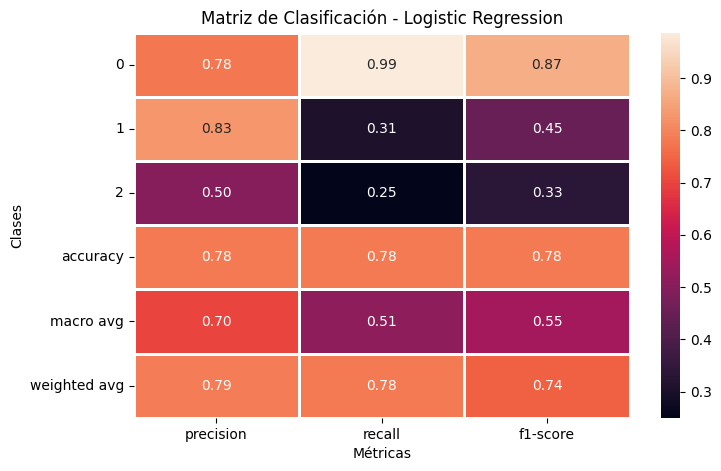

In [199]:
# Gráfico de Clasificación para Logistic Regression
class_report_lr = classification_report(y_test, pred_lr, output_dict=True)

class_report_lr_df = pd.DataFrame(class_report_lr).transpose()

class_report_lr_df = class_report_lr_df.drop(columns=['support'])

plt.figure(figsize=(8, 5))
sns.heatmap(class_report_lr_df, annot=True, fmt=".2f", linewidths=1, color='white')
plt.title("Matriz de Clasificación - Logistic Regression")
plt.ylabel("Clases")
plt.xlabel("Métricas")
plt.show()

### **Modelo de Bosque Aleatorio**

In [200]:
# Creamos y entrenamos el modelo de Random Forest
model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
model_rf.fit(X_train, y_train) 

# Realizamos predicciones
pred_rf = model_rf.predict(X_test)
pred_prob_rf = model_rf.predict_proba(X_test)[:,1]

In [201]:
# Evaluación
# Evaluación del modelo
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, pred_rf)) # Proporción de predicciones correctas globalmente -> tienen que estar balanceadas las clases
print("Precisión:", precision_score(y_test, pred_rf, average='weighted')) # ¿Cuántos de los que predije como clase X realmente eran clase X?
print("Recall:", recall_score(y_test, pred_rf, average='weighted')) # ¿Cuántos de los operadores que eran clase X, los identifiqué correctamente?
print("F1 Score:", f1_score(y_test, pred_rf, average='weighted')) # Promedio armónico de precisión y recall
# print("Classification Report:\n", classification_report(y_test, pred_rf)) # Resumen de precision, recall, f1 -> Util en clasificación multiclase

Random Forest:
Accuracy: 0.9817351598173516
Precisión: 0.9828421198284212
Recall: 0.9817351598173516
F1 Score: 0.9779034733138708


#### **Gráfico de Random Forest**

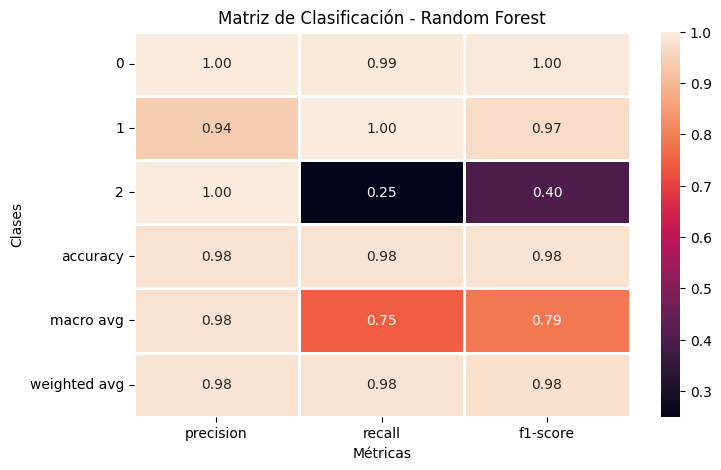

In [202]:
# Gráfico de Clasificación para Random Forest
class_report_rf = classification_report(y_test, pred_rf, output_dict=True)

class_report_rf_df = pd.DataFrame(class_report_rf).transpose()

class_report_rf_df = class_report_rf_df.drop(columns=['support']) # Queremos ver solamente las métricas 

plt.figure(figsize=(8, 5))
sns.heatmap(class_report_rf_df, annot=True, fmt=".2f", linewidths=1, color='white')
plt.title("Matriz de Clasificación - Random Forest")
plt.ylabel("Clases")
plt.xlabel("Métricas")
plt.show()

Significado de métricas:
* Precision: De todas las veces que el modelo predijo esta clase, ¿cuántas veces acertó? Es decir, ¿Cuántos verdaderos positivos hubo entre todos los que predijo como positivos?
* Recall: De todos los ejemplos reales de esta clase, ¿Cuántos logró encontrar correctamente? Es decir, ¿Qué tan bien identifica a los verdaderos positivos?
* F1-score: Promedio armonizado entre precisión y recall. Es útil cuando hay un desequilibrio entre clases.
* Support: Cuántas muestras del conjunto de *prueba* pertenecen realmente a esa clase. (es una cantidad)
____
* Accuracy: Es el porcentaje total de predicciones correctas entre todas las muestras.
* Macro avg: Promedio de las métricas entre todas las clases, sin considerar el número de muestras por clase
* Weighted avg: Promedio ponderado por el número de muestras de cada clase

### **Comparación de resultados entre Logistic Regression vs Random Forest**

In [203]:
# Comparación datos de prueba vs datos predichos
predicciones = pd.DataFrame({
    'y_real' : y_test.values,
    'y_pred_lr' : pred_lr,
    'y_pred_rf' : pred_rf
}, index = y_test.index)

print(predicciones.head(20))

       y_real  y_pred_lr  y_pred_rf
33120       1          0          1
15563       1          0          1
4096        0          0          0
33952       0          0          0
13273       0          0          0
11260       2          1          1
7639        0          0          0
4314        0          0          0
31248       0          0          0
25445       1          1          1
25939       1          1          1
32628       2          1          1
12694       0          0          0
38414       0          0          0
33940       0          0          0
8423        0          0          0
41052       0          0          0
7876        0          0          0
39974       0          0          0
18636       1          0          1


**Conclusión**

El modelo de Random Forest funciona mejor para nuestros datos de clasificación, el cual tiene una precisión y exactitud del 98% para predecir la ineficiencia de nuestros operadores en base a los resultados de las métricas.

## **Conclusión Final**

Este proyecto tuvo como objetivo principal identificar operadores ineficaces dentro de una compañía de telecomunicaciones, a partir del análisis de datos operativos y la aplicación de técnicas de aprendizaje automático supervisado.

En la etapa de Análisis Exploratorio de Datos y Pruebas de Hipótesis, se analizaron métricas como la proporción de llamadas perdidas, el tiempo promedio de espera por llamada y el volumen de llamadas salientes. A través de pruebas de hipótesis, se comprobó que existían diferencias estadísticamente significativas entre los operadores clasificados como ineficientes y aquellos con distitnos niveles de ineficiencia. Esto validó la segmentación inicial y justificó el desarrollo posterior de un modelo predictivo.

Se construyó un modelo de clasificación multiclase utilizando como variable objetivo el nivel de ineficiencia con valroes de 0 - 3. se implementaron dos enfoques, en donde los resultados mostraron que el modelo de Random Forest obtuvo mejor desempeño general, destacando en métricas como el f1-score. Sin embargo, se identificaron dificultades en la predicción de clases menos frecuentes (ineficiente alto) lo cual sugiere cierto desbalance de clases.

Por otro lado, se concluyó que las métricas (por orden de mayor ineficiencia) fueron: El bajo volumen de llamadas hechas por los operadores cuando se espera más proactividad, segundo el tiempo de espera, el cual ciertos operadores tienden a hacer esperar (o los hacen esperar) más tiempo que la mayoría (como lo vimos en los valores atípicos) incrementando la proporción de ineficiencia respecto al total, por último la métrica con menor porcentaje de ineficiencia fue la proporción alta de llamadas entrantes perdidas, el cual quiere decir que la mayoría de los operadores si responden a las llamadas, sin embargo el tiempo de espera es mucho mayor, y el volumen de llamadas salientes menor. 

A lo que vimos en el análisis, la mediana de proporción de llamadas entrantes perdidas es 0, el cuál indica que al menos el 50% de los datos, los operadores no pierden ninguna llamada; la mediana del tiempo de espera para las llamadas entrantes es de aproximadamente 15 segundos, el cuál relativamente no es mucho pero al menos en el 50% de los datos, los operadores tienen un tiempo de espera menor a 15; y por último, la mediana de llamadas salientes fue de 90, es decir, al menos el 50% de los datos, los operadores realizan 90 llamadas, por lo que un número menor a 90, indicaría ineficiencia (si aplicamos esas reglas).

En el análisis, mostramos una tabla de los operadores más ineficientes ordenados por nivel de eficiencia, sin embargo, estas visualizaciones son mejor mostrarlas en un Dashboard, de forma que sea más interactivo y fácil de leer, aplicando filtros para facilitar su análisis.

In [ ]:
# operator_metrics_clients_merged

In [ ]:
# telecom_df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time,avg_call_duration_per_call,avg_total_call_duration_per_call,avg_wait_time_per_call,year,month,day,day_of_week
0,166377,2019-08-04 00:00:00+03:00,in,0,0,1,2,0,4,4,0.0,2.000000,2.000000,2019,8,4,6
1,166377,2019-08-05 00:00:00+03:00,out,1,880022,1,3,0,5,5,0.0,1.666667,1.666667,2019,8,5,0
2,166377,2019-08-05 00:00:00+03:00,out,1,880020,1,1,0,1,1,0.0,1.000000,1.000000,2019,8,5,0
3,166377,2019-08-05 00:00:00+03:00,out,1,880020,0,1,10,18,8,10.0,18.000000,8.000000,2019,8,5,0
4,166377,2019-08-05 00:00:00+03:00,out,0,880022,1,3,0,25,25,0.0,8.333333,8.333333,2019,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10 00:00:00+03:00,out,1,957922,0,1,0,25,25,0.0,25.000000,25.000000,2019,11,10,6
53897,168606,2019-11-10 00:00:00+03:00,out,1,957922,1,1,0,38,38,0.0,38.000000,38.000000,2019,11,10,6
53898,168606,2019-11-11 00:00:00+03:00,out,1,957922,0,2,479,501,22,239.5,250.500000,11.000000,2019,11,11,0
53899,168606,2019-11-15 00:00:00+03:00,out,1,957922,0,4,3130,3190,60,782.5,797.500000,15.000000,2019,11,15,4


In [ ]:
# operator_metrics_clients_merged.to_csv('operator_metrics_clients_merged.csv')

In [207]:
# telecom_df.to_csv('telecom_df_cleaned.csv')